## Convolution can be expressed through FT

In [ ]:
import numpy as np

a = np.random.random(100000)
b = np.random.random(100000)


In [ ]:
%%time
c = np.convolve(a,b)
print(c)

[0.07629194 0.26053757 0.48357654 ... 0.33824974 0.34187885 0.00546427]
CPU times: user 7.32 s, sys: 8.68 s, total: 16 s
Wall time: 18 s


In [ ]:
%%time
from scipy.signal import fftconvolve

d = fftconvolve(a,b)

CPU times: user 533 ms, sys: 171 ms, total: 704 ms
Wall time: 1.16 s


In [ ]:
print(np.allclose(c,d))

True


In [ ]:
from torch.nn import Conv1d



#How to represent function by sums of another functions?

Let's create a set of random point

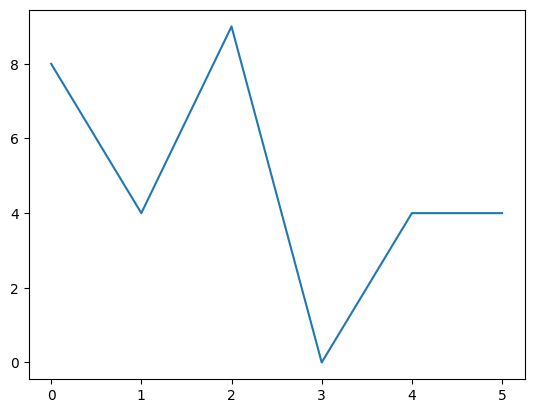

(6,)


In [11]:
import matplotlib.pyplot as plt
import numpy as np

y = np.random.randint(0,10,6)
x = np.array(list(range(0,len(y))))


plt.plot(x,y)
plt.show()
print(x.shape)


Approximate by sum of polynoms

Given set of points (x,y)
we can find the function passing through them as sum of nolynoms:

$ f(x) = k_0 + k_1x^1 + k_2x^2 + .. +k_9x^9$

[numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) return coefficients in reverse order:

`p(x) = p[0] * x**deg + ... + p[deg] `


In [27]:
p  = np.polyfit(x, y, deg =len(x)) #,  rcond=None, full=False, w=None, cov=False)
print("Coefficients",p)


Coefficients [-1.31821333e-03 -3.85601334e-02  1.37951867e-01  1.92159800e+00
 -9.11119045e+00  9.09151893e+00  5.00000000e+00]


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


because polyfit return coefficient in reverse order we flip it back



In [36]:
p = np.flip(p)
print("Reversed p from 0 to max degree",p)

p_count = len(p)
degrees = list(range(p_count))
print(list(zip(degrees,p)))


Reversed p from 0 to max degree [ 5.00000000e+00  9.09151893e+00 -9.11119045e+00  1.92159800e+00
  1.37951867e-01 -3.85601334e-02 -1.31821333e-03]
[(0, 5.0), (1, 9.091518932652567), (2, -9.111190451778763), (3, 1.92159799872335), (4, 0.13795186714898142), (5, -0.03856013341845102), (6, -0.001318213327658658)]


Plot the curve for each term

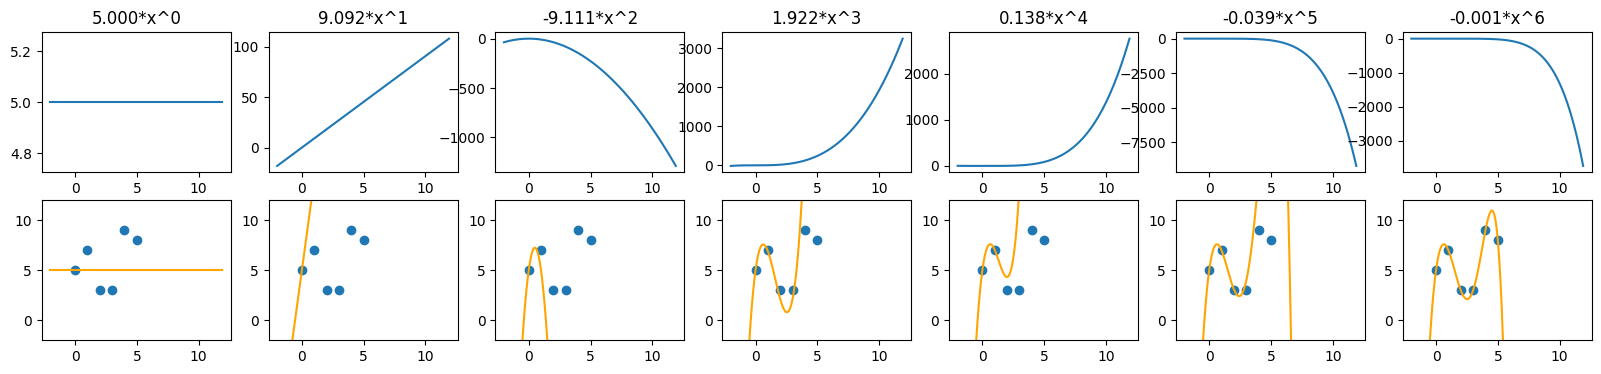

In [45]:
%matplotlib inline

fig = plt.figure(figsize=(20,4))
tx = np.arange(-2,12,0.1)
cummulative = np.zeros(tx.shape)

for i, deg in enumerate(degrees):
  plt.subplot(2, p_count, i+1)
  plt.gca().set_title(f"{p[i]:.3f}*x^{deg}")
  ty = p[i]*tx**(deg) # polynom of degree
  plt.plot(tx,ty)


  plt.subplot(2, p_count, p_count + (i+1), ylim = (-2,12))
  cummulative +=ty # sum of polynoms
  plt.scatter(x,y) # original points
  plt.plot(tx,cummulative, color="orange")

plt.show()

We can replace polynoms by periodic functions

In [49]:
from scipy.fftpack import fft, ifft

k = fft(x)
print("Complex value coefficients", p)
#plt.plot()
print(p[0])

Complex value coefficients [15.-0.j         -3.+5.19615242j -3.+1.73205081j -3.-0.j
 -3.-1.73205081j -3.-5.19615242j]
(15-0j)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


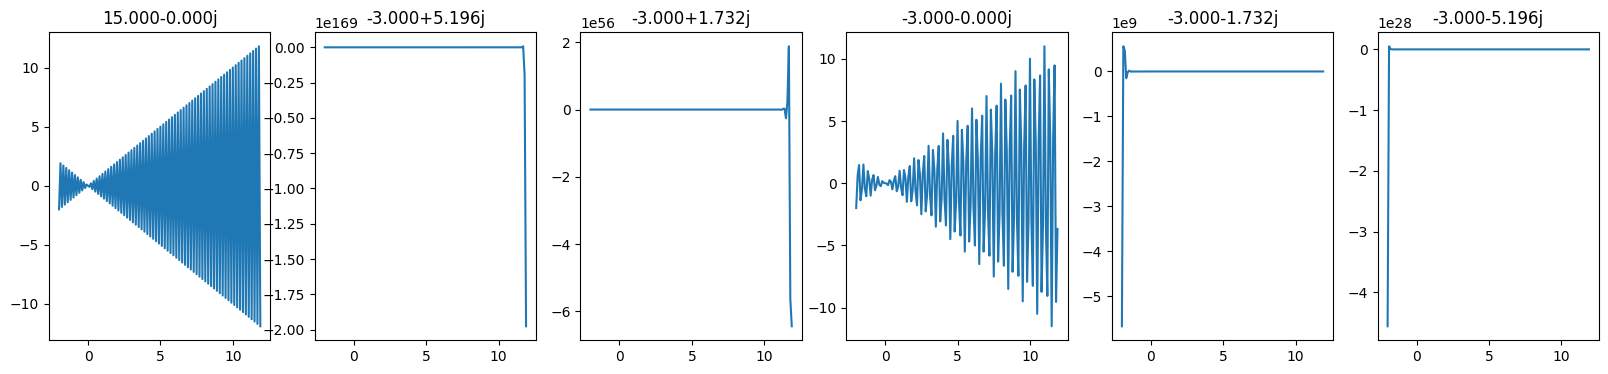

In [54]:
fig = plt.figure(figsize=(20,4))
tx = np.arange(-2,12,0.1)
cummulative = np.zeros(tx.shape)

for i  in range(len(k)):
  plt.subplot(1, len(k), i+1)
  plt.gca().set_title(f"{k[i]:.3f}")
  #ty = p[i]*tx**(deg) # polynom of degree
  ty = tx * np.exp(-2j * np.pi * k[i] * tx)
  plt.plot(tx,ty)







/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Coefficients [  0.03998611  -0.34979168  -0.26784712  10.41979139 -32.37713856
  28.53499985   2.        ]
[  0.03998611  -0.34979168  -0.26784712  10.41979139 -32.37713856
  28.53499985   2.        ]


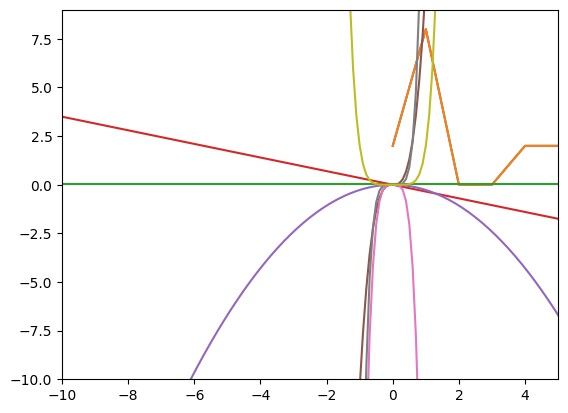

In [ ]:

print(coeff)
p = np.poly1d(coeff)
#print(approximation.shape)
y_app = p(x)
#print(y_app)

plt.plot(x,y)
plt.plot(x,y_app)
for i, c in enumerate(p.c):
  tx = np.arange(-10,10,0.1)
  ty = c*tx**(i)
  plt.plot(tx,ty)

plt.xlim([-10, len(x)-1])
plt.ylim([-10, max(y)+1])
plt.show()


approximate by sum of sine waves
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html
https://math.stackexchange.com/questions/690530/approximate-a-polynomial-function-using-a-sum-of-sine-waves

(6,) [15.-0.j         -3.+5.19615242j -3.+1.73205081j -3.-0.j
 -3.-1.73205081j -3.-5.19615242j]


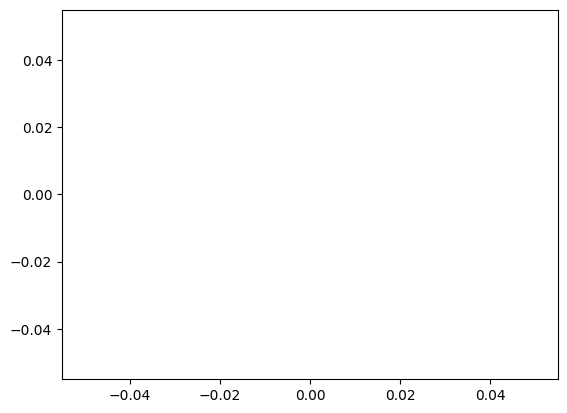

In [42]:
from scipy.fftpack import fft, ifft

f = fft(x)
plt.plot()

print(f.shape,f)

http://en.wikipedia.org/wiki/Discrete_cosine_transform

https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit

Fourier Transform

https://www.reg.ru/blog/svyortka-v-deep-learning-prostymi-slovami/